<div align="center">
<img src="https://github.com/kylejgillett/sounderpy/assets/100786530/2e9477c9-e36a-4163-accb-fe46780058dd" width="250">

# HOW-TO-USE SOUNDERPY TUTORIAL
##### TUTORIAL VERSION: 3.0 | COPYRIGHT Kyle J Gillett, Central Michigan University 2023
### [VISIT SOUNDERPY DOCUMENTATION HERE](https://github.com/kylejgillett/sounderpy/wiki)
##### SounderPy is a  Python package that helps you to access and plot vertical profile data for meteorological analysis 
    
</div>

-----
#### INSTALL SOUNDERPY
This is done using in your conda environment using the command `pip install sounderpy==2.0.6`,
Then we can open use this Jupyter Notebook to work with SounderPy!    

In [1]:
# first, import sounderpy! Its fun to import as 'spy'!
import sounderpy as spy


## ------------------ VERTICAL PROFILE DATA RETRIEVAL TOOL ------------------------ ##
##                    v2.0.6 | Oct 2023 | By Kyle J Gillett                         ##
##        RAOB, IGRA, RAP, RUC, NCEP, ERA5, RAP-ANALYSIS, BUFKIT & ACARS DATA       ##
## -------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------- ##



## UNDERSTANDING SOUNDERPY FUNCTIONALITY
-------
### `get_bufkit_data()`
    Access GFS, NAM, NAMNEST, RAP, HRRR, SREF, & HIRESW model forecast data 
### `get_model_data()`
    Access RAP, RUC, NCEP & ERA5 model reanalysis data 
### `get_obs_data()`
    Access RAOB & IGRAv2 observations
### `acars_data()`
    Access ACARS aircraft observations 

-----

## GETTING BUFKIT MODEL FORECAST DATA

In [2]:
################################ THE FUNCTION ###################################
# to get bufkit data, we need to use the `get_bufkit_data()` function
# `get_bufkit_data(model, station, fcst_hr, run_year, run_month, run_day, run_hour)`
################################################################################


########################## TYPES OF BUFKIT DATA ################################
# we can access archived model forecasts from the GFS, NAM, NAMNEST, RAP & HRRR
# or most recent run forecasts from the GFS, NAM, NAMNEST, RAP, HRRR, SREF, & HIRESW
################################################################################


########################## WHERE DATA IS AVAILABLE #############################
# NOTE: bufkit forecast data is *only available at specific BUFKIT site locations*
# you can find them here: http://www.meteo.psu.edu/bufkit/DomainNAMRAP_NAM_12.html
################################################################################


############################# LETS GET SOME DATA ###############################
# to get archived forecasts we need every kwarg. (a kwarg is a Keyword Argument, like 'year', and 'station')
# the line below will get us a 12z GFS forecast from 08/05/2023 at forecast hour 6 for bufkit site KMOP
clean_data = spy.get_bufkit_data('GFS', 'KMOP', 6, '2023', '08', '05', '12')

# to get the most recent forecasts we use the same function, but we *don't need a year, month, day or hour kwarg!*
# you just need a model, station and forecast hour.
# this will get you the most recent HRRR run, at forecast hour 6, for site KMOP.
clean_data = spy.get_bufkit_data('HRRR', 'KMOP', 6)

> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:01
> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


-----

## GETTING OBSERVED DATA

In [3]:
################################ THE FUNCTION ##################################
# to get observed data, we need to use the `get_obs_data()` function: 
# `get_obs_data(station, year, month, day, hour)`
################################################################################


########################## WHERE DATA IS AVAILABLE #############################
# you can find available RAOB sites here: 
# https://mesonet.agron.iastate.edu/sites/locate.php?network=RAOB
################################################################################


############################# LETS GET SOME DATA ###############################
# This function will get us a 12z RAOB for DTX on 08/05/2023
clean_data = spy.get_obs_data('DTX', '2023', '08', '05', '12')

> OBSERVED DATA ACCESS FUNCTION --
-----------------------------------
> FOUND RAOB: DTX on 08/05/2023 at 12z | From UW
> RUNTIME: 00:00:02


-----

## GETTING ACARS AIRCRAFT DATA

In [15]:
################################ THE FUNCTION ##################################
# unlike the other sounderpy functions, getting ACARS data uses a Python `class`: 
# `acars_data()`. This class has two functions, `list_profiles()` & `get_profile()`
################################################################################


##################### SETTING UP THE ACARS 'CONNECTION' ########################
# first we set up the connection to the ACARS data directory with the date we want 
# data from:
acars_conn = spy.acars_data(year='2023', month='10', day='04', hour='20')

# next we list all available profiles from that date:
acars_conn.list_profiles()

# out of the printed list of available profiles, copy one and add it to `.get_profile()`
# this returns the dictionary of clean data! (just be sure to run the next file in a seperate cell)
# clean_data = acars_conn.get_profile('DAL_2020')

> LIST ACARS PROFILES FUNCTION --
---------------------------------
> AVAILABLE ACARS PROFILES FOR 2023-10-04 20Z...
> COMPLETE --------
> RUNTIME: 00:00:00


['ABQ_2010',
 'ATL_2000',
 'ATL_2030',
 'AUS_2020',
 'AUS_2040',
 'BNA_2050',
 'BUF_2010',
 'BWI_2000',
 'BWI_2040',
 'CMH_2050',
 'DAL_2020',
 'DAL_2030',
 'DAL_2040',
 'DCA_2030',
 'DEN_2000',
 'DEN_2020',
 'FLL_2040',
 'FLL_2050',
 'JSJ_2020',
 'LAS_2010',
 'LAS_2030',
 'LAS_2040',
 'LAS_2050',
 'LGB_2000',
 'LGB_2010',
 'LGB_2050',
 'MCI_2000',
 'MCI_2050',
 'MDW_2000',
 'MDW_2010',
 'MDW_2040',
 'MSP_2000',
 'OKC_2010',
 'ONT_2000',
 'ORD_2000',
 'PDX_2040',
 'PHL_2040',
 'PHX_2010',
 'PHX_2030',
 'PVR_2000',
 'RDU_2020',
 'RIC_2000',
 'SAT_2000',
 'SDF_2000',
 'SDF_2030',
 'SEA_2020',
 'SJC_2010',
 'SJC_2050',
 'SLC_2040',
 'SMF_2000',
 'SMF_2010']

_____


## GETTING REANALYSIS DATA

In [6]:
################################ THE FUNCTION ###################################
# To get reanalysis data from the ERA5, NCEP-FNL, RAP or RUC, we use
# `get_model_data(method, latlon, year, month, day, hour)`
#################################################################################


########################## UNDERSTANDING THE KWARGS #############################
# `method` is what str with the name of the model we want to use, 'era5', 'ncep', or 'rap-ruc'
# `latlon` is a list of a lat & lon point, such as: `[33.19, -87.46]`
# the 'date' kwargs are all str for the date & time that you want to 'reanalize'
#################################################################################


########################### SETTING UP ERA5 DATA ################################
# NOTE: to use ERA5 data, you must set up an account with the Climate Data Store 
# to receive an API key which gives you access to the data. Do so here: 
# https://cds.climate.copernicus.eu/api-how-to
#################################################################################


################# *NOTE* REANALYSIS DATA NEEDS TWO FUNCTIONS! ###################
# NOTE: after using `get_model_data()`, you must then use the `parse_data()`
# function to clean up the data before use. See below
#################################################################################


############################# LETS GET SOME DATA ################################
# this function will get us a *RAW* 22z RAP profile on 4/27/2011 at the point [33.19, -87.46]
raw_data = spy.get_model_data('rap-ruc', [33.19, -87.46], '2011', '04', '27', '22')

# you can run this for ERA5 and NCEP-FNL data too:
# raw_data = spy.get_model_data('ncep', [33.19, -87.46], '2011', '04', '27', '22')
# raw_data = spy.get_model_data('era5', [33.19, -87.46], '2011', '04', '27', '22')

# now put it through the parse_data() function -- this is *ONLY NEEDED* after the get_model_data()
# this function will clean up the data for us and give us a *CLEAN* profile
clean_data = spy.parse_data(raw_data)

> RAP REANALYSIS DATA ACCESS FUNCTION --
-----------------------------------------
> DATASET USED: RUC_13km
> COMPLETE --------
> RUNTIME: 00:00:19
> REANALYSIS DATA PARSE FUNCTION --
------------------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


## CHECK OUT THE DATA

In [7]:
# Lets check out the RAP data that we just accessed
# and stored in the `clean_data` variable: 

# `clean_data` is a python dictionary of 'clean' vertical profile data
# it comes with temperature, dewpoint, pressure, height, u and v
# as well as a number of useful 'meta data'

clean_data

{'T': array([ 26.1499939 ,  25.93467833,  23.62897051,  21.31674707,
         19.4368386 ,  18.25024343,  16.90655025,  15.19136016,
         13.49384043,  11.72010756,  10.22210965,   8.44835342,
          7.41135634,   7.17951153,   6.4194837 ,   5.11312561,
          3.52813894,   1.78941062,   0.21456882,  -1.35948293,
         -2.98679228,  -4.75646559,  -6.56210379,  -8.39845353,
        -10.29096014, -12.20431837, -14.14417194, -16.15506904,
        -18.1827888 , -20.18279219, -22.20169273, -24.27263128,
        -26.30173853, -28.26351376, -30.22304713, -32.17914963,
        -34.11441523, -36.00087551, -37.87870974, -39.6466817 ,
        -41.41465366, -42.68371907, -43.73610425, -44.85203866,
        -46.38731495, -47.92259125, -49.66657879, -51.8327824 ,
        -53.99898601, -56.11866785, -58.12106241, -60.12345697,
        -62.12585154, -63.32145633, -64.46373388, -65.60601142,
        -66.63335869, -67.1136015 , -67.5938443 , -68.0740871 ,
        -68.55432991, -68.14798067,

-----

## LETS PLOT THE DATA ON A SOUNDING AND HODOGRAPH

> SOUNDING PLOTTER FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:02


C:\Users\kjgil\miniconda3\lib\site-packages\sounderpy\sounderpy.py:1774: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


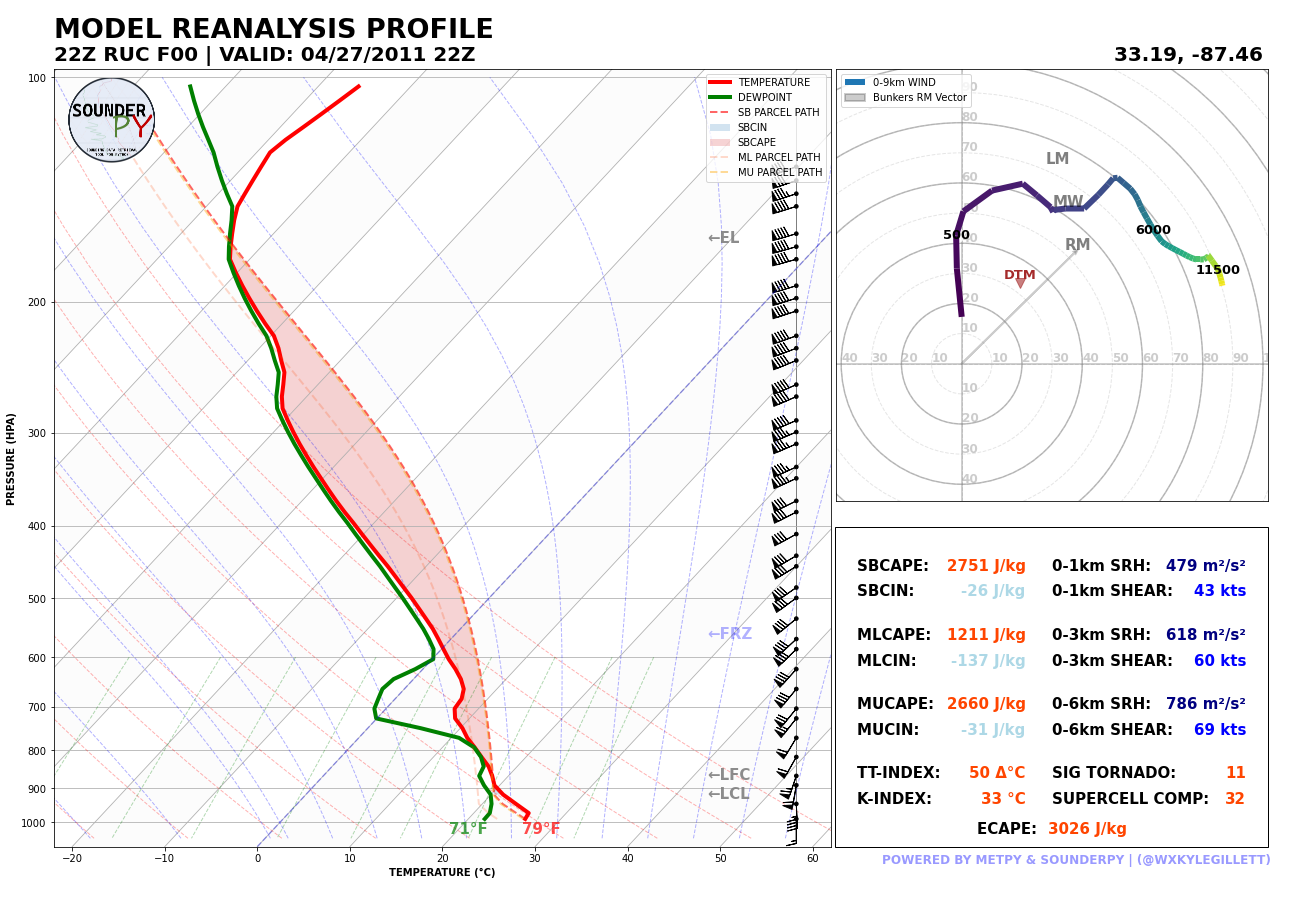

In [8]:
################################ THE FUNCTION ###################################
# `metpy_sounding(clean_data, method='show', filename=None)`
# `metpy_hodograph(clean_data, method='show', filename=None)`
#################################################################################


# we will use the 'show' kwarg here to plot it inline
# but you can also use 'save' and add an additional kwarg 'filename'
# to save the plot to a file!
# for example: `metpy_sounding(clean_data, method='save', filename='04272011_22z_sounding.png')`

# first here we can make a sounding! 
spy.metpy_sounding(clean_data, 'show')

> HODOGRAPH PLOTTER FUNCTION --
---------------------------------
> RUNTIME: 00:00:02


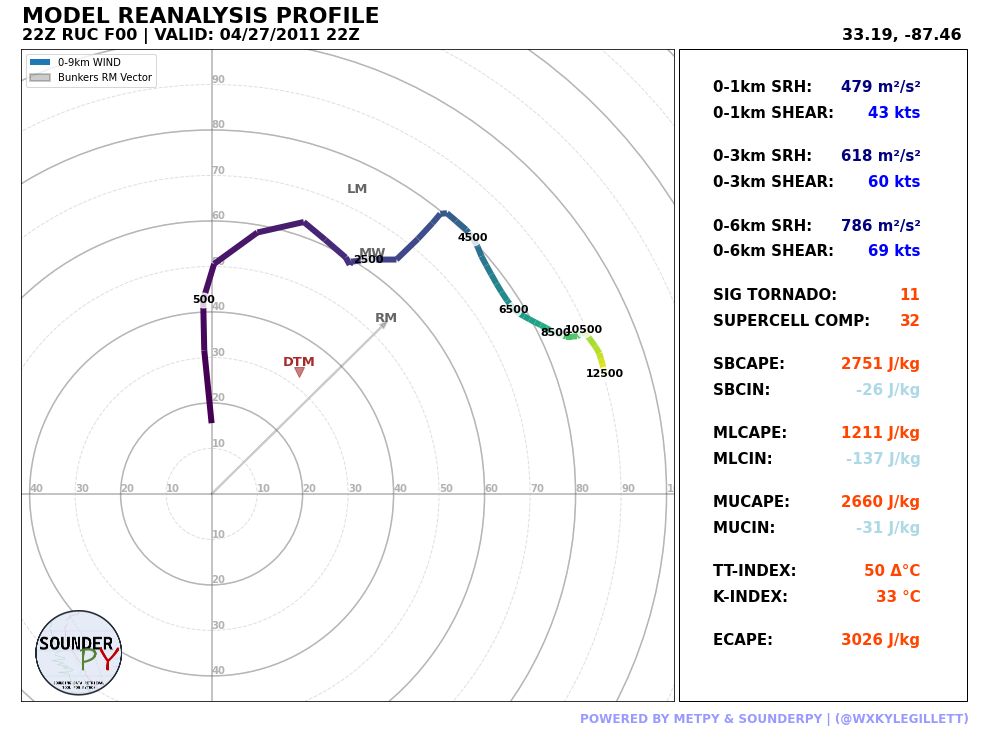

In [9]:
# and we can make a hodograph!
spy.metpy_hodograph(clean_data, 'show')

-----

### Its THAT simple to get data with SounderPy!

----

## SAVING PROFILE DATA TO A FILE

In [11]:
# SounderPy offers three ways to use this...

# you can save sounderpy data to a CSV, CM1 input file or a SHARPPY 'NSHARP' file
#spy.to_file('csv', clean_data)
#spy.to_file('cm1', clean_data)
#spy.to_file('sharppy', clean_data)

----

## FINDING LAT/LON PAIRS

In [ ]:
# SounderPy offers several ways to find latlons!

# you can find the lat/lon pair for any METAR, RAOB, IGRA, BUFKIT or Buoy site! 
# use the get_latlon() function:
spy.get_latlon('metar', 'KJXN')
spy.get_latlon('bufkit', 'KLAN')
spy.get_latlon('raob', 'DTX')